# Zuber. 

## Introduction

This project aims to analyze data related to transportation services in the city of Chicago, using three main datasets. The goal is to obtain useful information for Zuber, a new ride-hailing company in the city. Through a statistical and visual approach, the project seeks to explore patterns related to the number of trips made by taxi companies, the most popular destinations within the city, and weather conditions that may influence trip duration. This analysis will not only provide descriptive information but also validate specific hypotheses to better understand transportation behavior in different scenarios.

## Goals.
**Explore and Clean the Data:** <br><br>

Import and examine the three provided data sets.<br>
Ensure the data types are correct and ready for analysis.<br>

**Descriptive Analysis:**<br><br>

Identify the taxi companies with the highest number of trips during November 15 and 16, 2017.<br>
Determine the 10 most popular neighborhoods by trip completions in November 2017.<br>

**Data Visualization:**<br><br>

Create clear and meaningful graphs that represent data related to:<br>
Taxi companies and their number of trips.<br>
Top 10 neighborhoods by trip completions.<br>

**Hypothesis Testing:**<br><br>

Evaluate whether the average trip duration from the Loop to O'Hare International Airport Change rainy Saturdays using statistical methods.<br>
Establish the null and alternative hypotheses, determine the level of significance, and justify the methods used.<br>

**Conclusions:**<br><br>
Base the results of the analysis on useful observations about transportation in Chicago.


## Development

### Import libraries 

In [1]:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt


### Data load

In [2]:
company= pd.read_csv('/Users/pauli/Documents/Data/zuber/project_sql_result_01.csv')
location= pd.read_csv ('/Users/pauli/Documents/Data/zuber/project_sql_result_04.csv')

In [3]:
company.info()

company.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


0

The data types for the company table are correct: the company name is an object, and the number of trips is an integer. We note that there are no empty values. There are no duplicate values.

In [4]:

location.info()

location.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


0

The data type is correct; however, since the number of trips is an average, this number will be converted to integers to facilitate data analysis. There are no empty values. There are no duplicate values.

### Data Improvement

In [5]:
# Convert the average number of trips to whole numbers by rounding to the nearest integer and converting the data type to integer.

location['average_trips']= round(location['average_trips']).astype(int)

### Identify the top 10 neighborhoods in terms of tour completion

In [6]:
top_loc= location.sort_values(by='average_trips', ascending=False).head(10)
top_loc

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


<Axes: title={'center': 'Top Ten Neighborhoods with Completed Trips'}, xlabel='Neighborhood Name', ylabel='Total Average Dropoffs'>

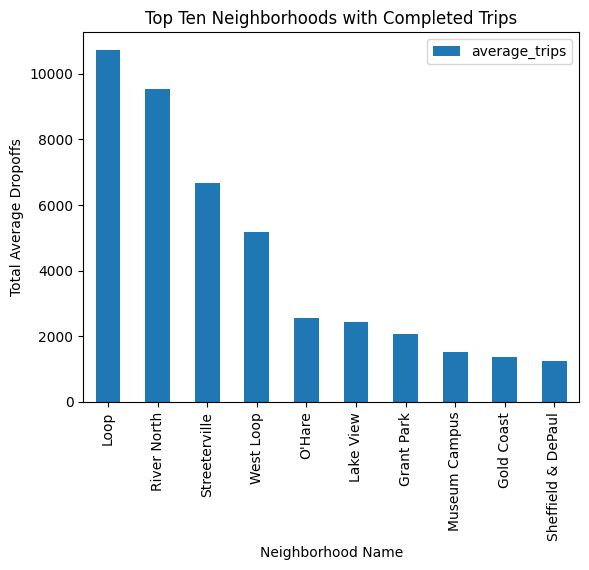

In [7]:
top_loc.plot(kind='bar',                  
                   x='dropoff_location_name',
                   y='average_trips',
                   title='Top Ten Neighborhoods with Completed Trips',
                   xlabel='Neighborhood Name',
                   ylabel='Total Average Dropoffs')

The neighborhoods with the most completed trips are the Loop and River North, with little difference between them, around 10,000 trips on average. Followed by Streetville, which also reaches almost 6,000 trips. The rest of the neighborhoods included in this top 10 have relatively similar figures, around 2,000 trips or slightly less.

### Taxi Companies and Number of Trips

To create the graph, we'll take the top 10 companies in terms of number of trips.

In [8]:
top_trips= company.sort_values(by='trips_amount', ascending=False).head(10)


top_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<Axes: title={'center': 'Number of trips per Company.'}, xlabel='Company Name', ylabel='Number of Trips'>

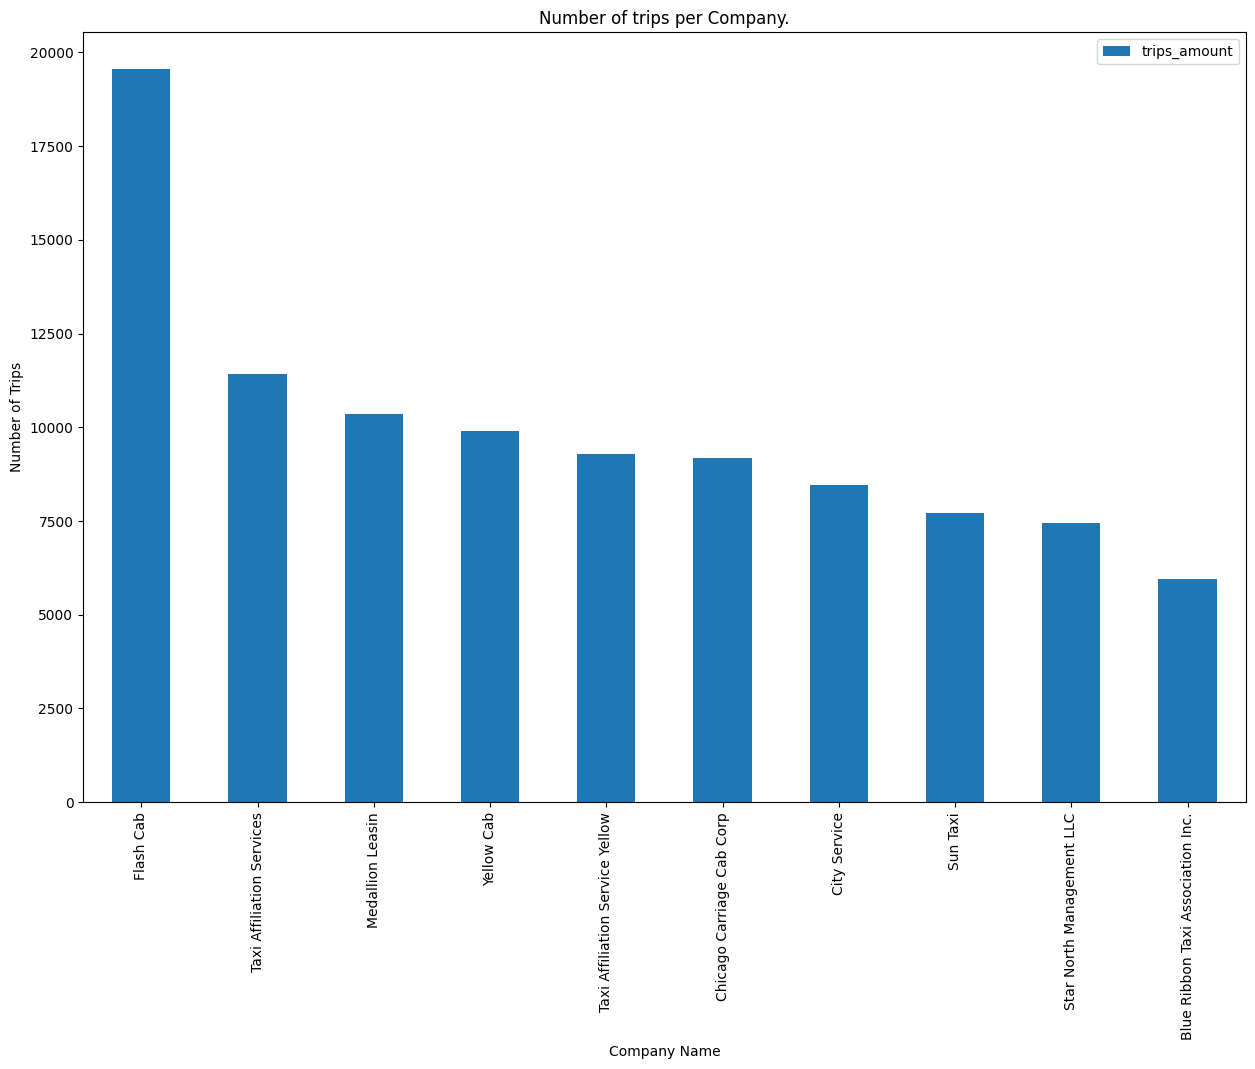

In [9]:
top_trips.plot(kind='bar',                  
                   x='company_name',
                   y='trips_amount',
                   title='Number of trips per Company.',
                   xlabel='Company Name',
                   ylabel='Number of Trips',
                   figsize=[15, 10])

Flash Cab stands out significantly as the leader in the number of trips taken, with a value close to 20,000 trips.<br>There is a noticeable drop in the number of trips between the top companies (such as Taxi Affiliation Services and Medallion Leasing) and the smaller companies.<br><br>A significant number of companies appear to take fewer than 5,000 trips in total, indicating that many operate in a smaller niche or have less operational capacity.

### Travel data from the Loop to O'Hare International Airport.

In [10]:
# Data import
airport= pd.read_csv ('/Users/pauli/Documents/Data/zuber/project_sql_result_07.csv')

airport.info()
airport.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
# Convert the data type of start_ts to date

airport['start_ts'] = pd.to_datetime(airport['start_ts'])

#Create a column to identify the day of the week

airport['day_of_week'] = airport['start_ts'].dt.day_name()


In [12]:
airport.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [13]:
#Filter to Saturdays:

saturday= airport[(airport['day_of_week'] == 'Saturday')]

# Filter by rainy Saturdays:
rain_sat= saturday[saturday['weather_conditions']== 'Bad']['duration_seconds']

#Filter by sunny days:

sun_sat= saturday[saturday['weather_conditions']== 'Good']['duration_seconds']


In [14]:
# Statistical analysis:

rain_sat.describe()


count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [15]:
sun_sat.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

The number of trips on rainy Saturdays decreases significantly from 888 on sunny days to 180.

The average trip duration is approximately 20% longer on rainy days (2427.21 seconds) compared to sunny days (1999.68 seconds). This suggests that rainy weather can impact travel times, likely due to slower traffic conditions.

All percentiles (25%, 50%, and 75%) are higher on rainy days than on sunny days, reinforcing the hypothesis that trips tend to take longer in the rain.

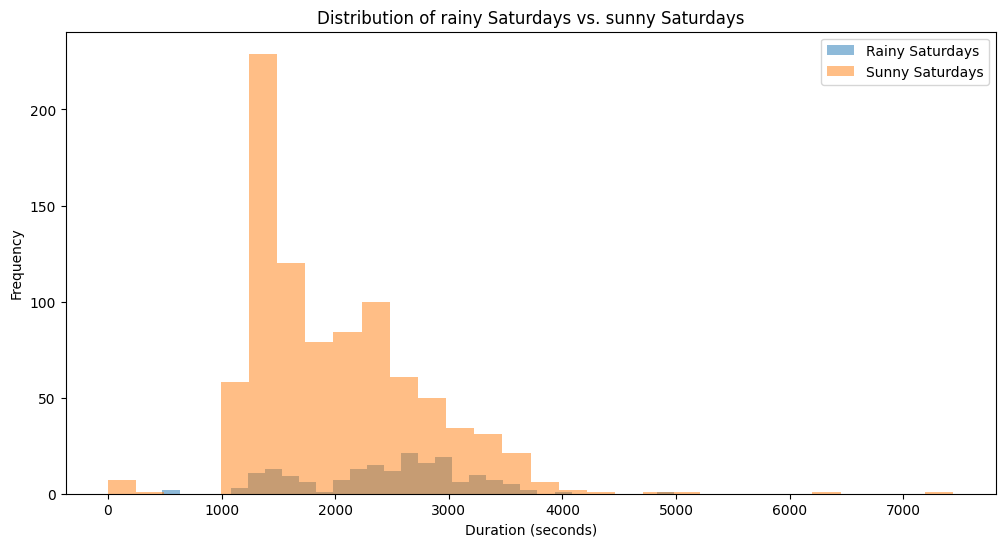

In [16]:
# Show the comparative distribution of both groups

plt.figure(figsize=(12, 6))
plt.hist(rain_sat, bins=30, alpha=0.5, label='Rainy Saturdays')
plt.hist(sun_sat, bins=30, alpha=0.5, label='Sunny Saturdays')
plt.title('Distribution of rainy Saturdays vs. sunny Saturdays')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The orange bar (sunny Saturdays) dominates the distribution, especially between 1000 and 2000 seconds, indicating that trips on sunny days are more frequent at this duration. <br>
The curve for rainy Saturdays (blue bar) appears to shift slightly to the right compared to that for sunny Saturdays. This suggests that, on average, trips on rainy Saturdays tend to last longer.
<br>For long durations (more than 3000 seconds), the blue bar still has a significant presence compared to the orange one, reinforcing the previous idea.

**Remove outliers**

In [17]:
# Calculate quartiles and IQR
Q1 = rain_sat.quantile(0.25)
Q3 = sun_sat.quantile(0.75)
IQR = Q3 - Q1

# Define limits to detect outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filter data without outliers
new_rain = rain_sat[(rain_sat>= limite_inferior) & (rain_sat<=limite_superior)]
new_sun= sun_sat[(sun_sat>= limite_inferior) & (sun_sat<= limite_superior)]


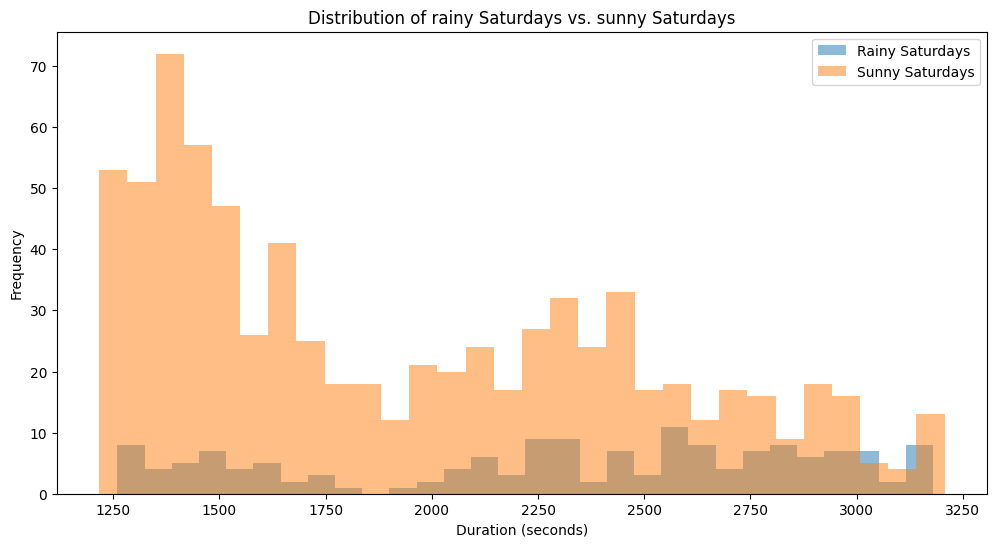

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(new_rain, bins=30, alpha=0.5, label='Rainy Saturdays')
plt.hist(new_sun, bins=30, alpha=0.5, label='Sunny Saturdays')
plt.title('Distribution of rainy Saturdays vs. sunny Saturdays')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Now, the values ​​are restricted to a more manageable range (approximately 1250 to 3250 seconds). This allows for a clearer analysis of the differences. Without the outliers, the comparison focuses on the central range, showing that sunny days still have more trips than rainy ones, although trips on rainy days have significant frequencies in some ranges.

### Hypothesis testing

**Null Hypothesis**: The average trip length from the Loop to O'Hare International Airport is the same on rainy Saturdays.<br>
**Alternative Hypothesis**: The average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays.<br>
**Significance Level**: 5%

In [19]:
# Levene Test: 

p_levene = st.levene(new_rain, new_sun)
print("Levene's test for equality of variances:")
print("p-value:", p_levene.pvalue)


Levene's test for equality of variances:
p-value: 0.8742629059539857


Levene's test is performed, which helps us determine whether the variances are equal or different. This is important because the test we are going to perform to test our hypothesis assumes that both variables have the same variance. If they do not, we must inform the tester so that the calculations can be performed correctly.

In this case, the p value is greater than 0.05, which means that the variances are not significantly different and the assumption of homogeneity of variance is met.

In [20]:
# T-test :
alpha= 0.05
t_test= st.ttest_ind(new_rain, new_sun)

print ("p-value t test:", t_test.pvalue)

if t_test.pvalue < alpha:
    print("The difference in average durations between rainy and non-rainy Saturdays is statistically significant.")
else:
    print("There is insufficient evidence to state that the average durations are significantly different.")

p-value t test: 1.4809295191339424e-14
The difference in average durations between rainy and non-rainy Saturdays is statistically significant.


## Conclusion

Flash Cab, Taxi Affiliation Services, and Medallion Leasing clearly lead the market in terms of the number of trips completed, with Flash Cab being their main competitor. To better understand their success, it would be helpful to analyze their specific marketing or pricing strategies, if available, and how Zuber can compete advantageously alongside them. <br> Neighborhoods such as the Loop and River North stand out for having the highest number of trip completions. This could reflect their status as shopping centers, tourist hubs, or densely populated residential areas. Zuber could consider allocating more vehicles to these neighborhoods, especially during peak hours or special events. <br> The hypothesis analysis confirmed that there is a significant difference in average trip durations between rainy and good-weather Saturdays. Specifically, trips tend to take longer on rainy days. Given this finding, Zuber could implement measures such as informing customers about potential delays, adjusting fares based on weather conditions, and planning alternative routes to reduce travel times on days with bad weather.

